In [288]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy import stats
from collections import Counter
import math
import statistics
from scipy.stats import norm
import pandas as pd
%matplotlib inline

## Сгенерируем выборку объема n = 25 из экспоненциального распределения

In [289]:
def exponential_distribution(sample_size, parametr = 1):
    #Генерирует выборку объема sample_size из экспоненциального распределения с параметром parametr
    exp_selection = np.round(np.random.exponential(parametr, sample_size), decimals=3)
    return exp_selection

sample_size = 25

lambd = 1

exp_selection = exponential_distribution(sample_size, lambd)

exp_df = pd.DataFrame(exp_selection)            

print(exp_df)

        0
0   1.710
1   0.593
2   0.876
3   2.375
4   2.539
5   1.165
6   0.632
7   1.017
8   3.689
9   3.767
10  0.791
11  0.755
12  0.484
13  0.308
14  0.243
15  0.393
16  1.272
17  0.559
18  0.060
19  0.992
20  0.163
21  1.051
22  0.874
23  2.744
24  1.240


## а) Сгенерировать по выборке моду, медиану, размах, оценку коэффициента асимметрии

In [290]:
#Task a)
def mode(data):
    #Возвращает наиболее часто встречающееся значение в выборке или "нет моды", если такового нет
    counter = Counter(data) #коллекция значений с частотами появления
    most_common = counter.most_common() #Отсортированный по частотам список кортежей (<значение>, <частота>)
    if(most_common[0][1] != most_common[1][1]):
        return most_common[0][0]
    else:
        return "нет моды"

def get_statistics(data):
    
    #Мода
    data_mode = mode(data)

    #Медиана
    data_median = np.median(data)

    #Размах
    data_range = round(max(data) - min(data), 3)

    #Коэффициент асимметрии
    data_coef_asymmetry = round(stats.skew(data), 3)

    return {'мода': data_mode,
            'медиана': data_median,
            'размах': data_range,
            'коэффициент асимметрии': data_coef_asymmetry}



In [291]:
#Получаем характеристики, описывающие выборку (моду, медиану, размах и коэффициент асимметрии выборки)
statistics = get_statistics(exp_selection)

# #Печаем данные
for key, value in statistics.items():
    print(f'{key}: {value}')

мода: нет моды
медиана: 0.876
размах: 3.707
коэффициент асимметрии: 1.282


## b) Построить эмпирическую функцию распределения, гистограмму и boxplot

In [292]:
#Task b)
def show_statistics(data):
    #Строит эмпирическую функцию распределения, гистограмму и ящик с усами (boxplot)
    data_sorted = np.sort(data)

    fig, axs = plt.subplots(3, 1, figsize = (6, 10))
    ax1, ax2, ax3 = axs  

    #Эмпирическая функция распределения
    ax1.set_title('Эмпирическая функция распределения')    
    ax1.grid(which='major', color='gray',linewidth=0.7)    
    ax1.step(data_sorted, np.arange(1, len(data) + 1) / len(data), color="black")      
         
    #Гистограмма
    counts, bins, patches = ax2.hist(data_sorted, color='blue', edgecolor='black', bins=round(1 + math.log2(len(data_sorted))))    
    
    new_counts = counts / len(data_sorted)

    ax2.clear()    
    ax2.bar(bins[:-1], new_counts, width=np.diff(bins), color='blue', edgecolor='black')    
    ax2.set_title('Гистограмма')

    #Ящик с усами
    ax3.boxplot(data_sorted, vert = False)
    ax3.set_title('Ящик с усами (boxplot)')

    plt.tight_layout() #Для удовлетворения чувства прекрасного
        
    plt.show()





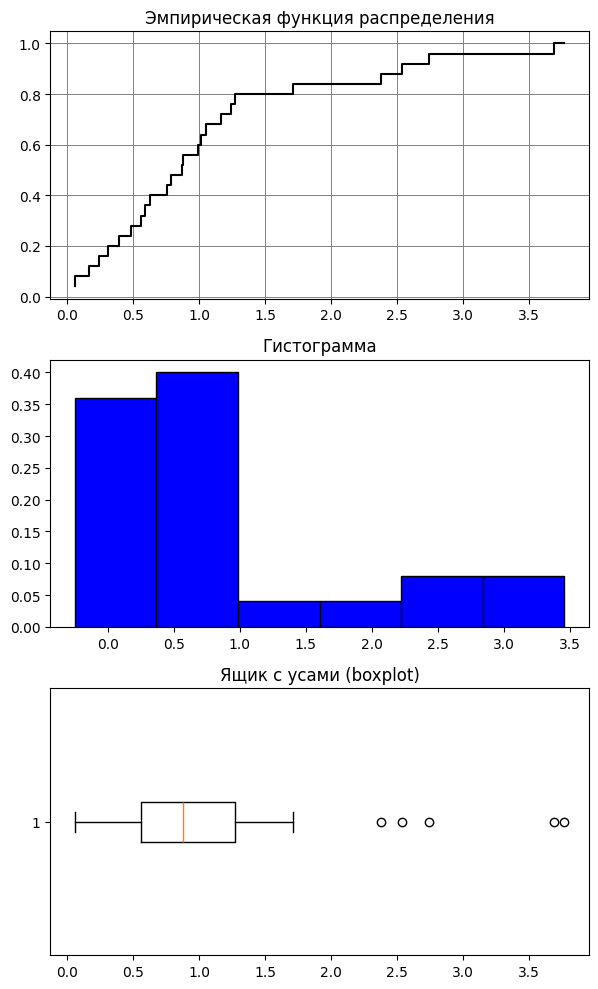

In [293]:
#Рисуем графики
show_statistics(exp_selection)

## c) Сравнить оценку плотности распределения среднего арифметического элементов выборки, полученного с помощью ЦПТ, с бутстраповской оценкой этой плотности

In [294]:
#Task c)
def bootstrap_means(data, samples_number):
    #Возвращает массив из средних значений каждой выборки от исходной выборки
    n = len(data)
    bootstrap_means = np.empty(samples_number)

    for i in range(samples_number):
        sample = np.random.choice(data, size = n, replace = True)
        bootstrap_means[i] = np.mean(sample)

    return bootstrap_means

def show_bootstrap_distribution(data, samples_number):
    #Рисует гистограмму плотности распределения среднего арифметического элементов выборки
    #Накладывает плотность распределения полученное с помощью ЦПТ (нормальное распределение)
    bootstrap_means_array = bootstrap_means(data, samples_number)
    sorted_arr = np.sort(bootstrap_means_array)

    sigma = 1 #дисперсия

    mat_waiting = 1 #математическое ожидания

    fig, axs = plt.subplots(1, 1, figsize = (12, 8))
    axs.set_title("Сравнение плотности среднего арифметического, полученного с помощью ЦПТ с бустраповской оценкой")
    axs.grid()
    
    #Рисуем нормальное распределение
    x = np.linspace(mat_waiting - sigma, mat_waiting + sigma, 1000)
    axs.plot(x, sp.stats.norm.pdf(x, 1, 0.2), color='red')

    #Рисуем гистограмму
    axs.hist(bootstrap_means_array, bins=1+int(np.log2(samples_number)), color='blue', density=True)    
     
    plt.show()


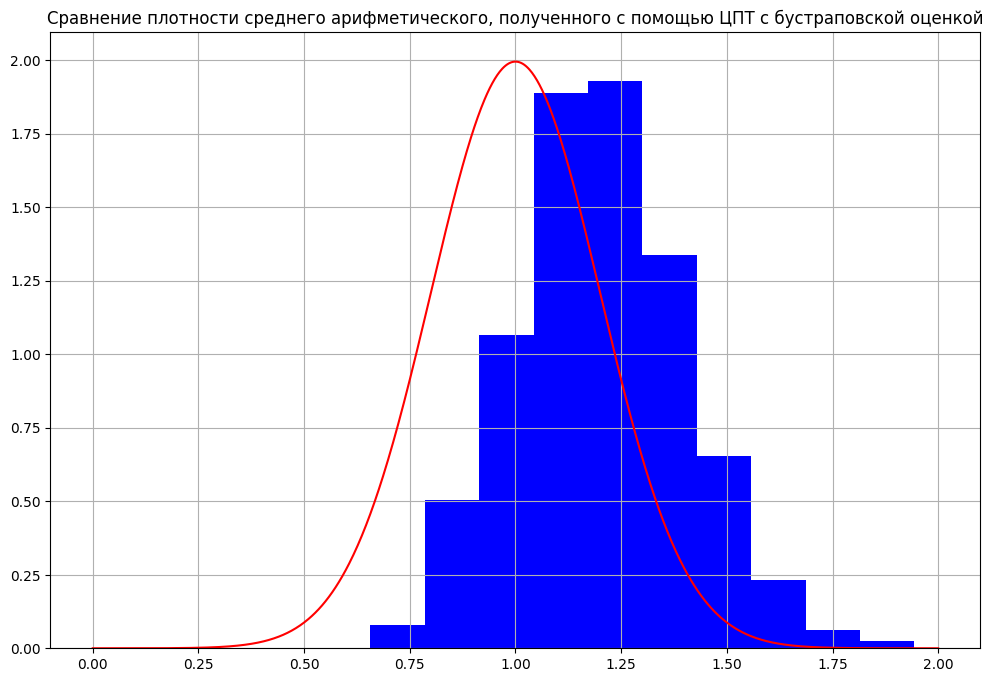

In [295]:
#Рисуем гистограмму плотности распределения среднего арифметического элементов выборки

samples = 1000

show_bootstrap_distribution(exp_selection, samples)

## d) Найти бутстраповскую оценку плотности распределения коэффициента асимметрии и оценить вероятность того, что коэффициент асимметрии будет меньше одного

In [296]:
#Task d)
def bootstrap_coef_asymmetry(data, samples_number):
    #Возвращает массив из коэффициентов асимметрии каждой выборки от исходной выборки
    n = len(data)
    bootstrap_coef_asymmetry = np.empty(samples_number)

    for i in range(samples_number):
        sample = np.random.choice(data, size = n, replace = True)
        bootstrap_coef_asymmetry[i] = round(stats.skew(sample), 3)

    return bootstrap_coef_asymmetry

def show_coef_asymmetry_distribution(data, samples_number):
    #Рисует гистограмму плотности распределения коэффициентов асимметрии элементов выборки
    bootstrap_coef_asymmetry_array = bootstrap_coef_asymmetry(data, samples_number)
    fig, ax = plt.subplots(figsize = (12, 8))
    ax.hist(bootstrap_coef_asymmetry_array, color = 'blue', edgecolor = 'black', bins = round(1 + math.log2(len(bootstrap_coef_asymmetry_array))))

    #Перестраиваем гистограмму так, чтобы по оси y были вероятности
    y_value, bins, patches = plt.hist(bootstrap_coef_asymmetry_array, bins=30, alpha=0.5, color='blue')
    y_new_value = y_value / samples_number #делим на количество подвыборок, чтобы посчитать вероятность
    plt.clf()
    plt.bar(bins[:-1], y_new_value, width=np.diff(bins), alpha=0.5, color='blue', align='edge', edgecolor = 'black')
    plt.title('Плотность распределения коэффициента асимметрии элементов выборки')
    plt.xlabel('Значения')
    plt.ylabel('Вероятность')

    plt.show()


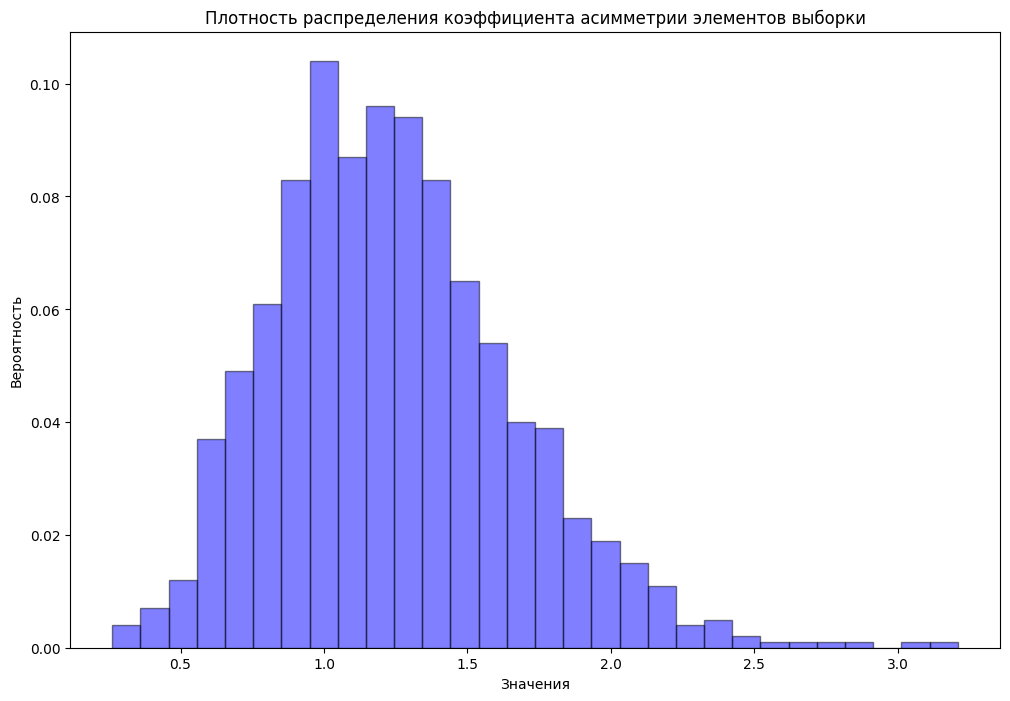

In [297]:
samples = 1000

#Рисуем гистограмму плотности распределения коэффициента асимметрии элементов выборки
show_coef_asymmetry_distribution(exp_selection, samples)

# Вероятность того, что коэффициент асимметрии меньше 1

In [298]:
def probability_coef_assym_less_then_1(data, samples_number):
    bootstrap_coef_asymmetry_array = bootstrap_coef_asymmetry(data, samples_number)
    count_less_then_1 = 0

    for i in range(len(bootstrap_coef_asymmetry_array)):
        if(bootstrap_coef_asymmetry_array[i] < 1):
            count_less_then_1 += 1
    
    probability = round(count_less_then_1 / samples_number, 3)

    return probability

In [299]:
print("Вероятность того, что коэф асимметрии меньше 1: ", probability_coef_assym_less_then_1(exp_selection, samples))

Вероятность того, что коэф асимметрии меньше 1:  0.274


## e) Сравнить плотность распределения медианы выборки с бутстраповской оценкой этой плотности

In [300]:
#Task e)
def bootstrap_median(data, samples_number):
    #Возвращает массив из медиан каждой выборки от исходной выборки
    n = len(data)
    bootstrap_means = np.empty(samples_number)

    for i in range(samples_number):
        sample = np.random.choice(data, size = n, replace = True)
        bootstrap_means[i] = np.median(sample)

    return bootstrap_means

def show_median_distribution(data, samples_number): 
    #Рисует гистограмму плотности распределения медиан элементов выборки
    bootstrap_median_array = bootstrap_median(data, samples_number)
    fig, ax = plt.subplots(figsize = (12, 8))

    #Рисуем нормальное распределение
    mat_waiting = 1

    sigma = 1

    x = np.linspace(mat_waiting - sigma, mat_waiting + sigma, 1000)
    ax.plot(x, sp.stats.norm.pdf(x, 1, 0.2), color='red')    
       
    #Рисуем гистограмму
    ax.hist(bootstrap_median_array, bins=int(1 + np.log2(samples)), color="blue", edgecolor = "black", density=True)
    
    ax.set_title('Сравнение плотности распределения медиан с бустраповской оценкой')       
    plt.grid()
    plt.show()

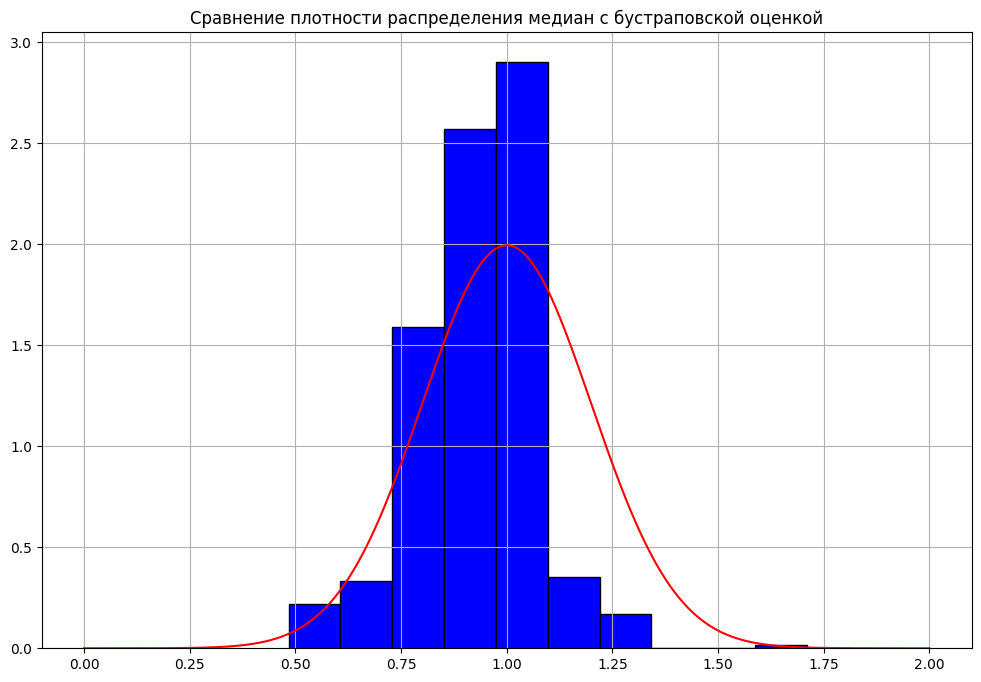

In [ ]:
#Рисуем гистограмму плотности распределения медиан элементов выборки
samples = 1000

show_median_distribution(exp_selection, samples)